# **PROYEK PERTAMA : MEMBUAT MODEL NLP DENGAN TENSORFLOW 👨🏽‍💻**

* Name         : Lintang Nagari
* Email        : unggullintangg@gmail.com
* Linkedin     : <a href='https://www.linkedin.com/in/lintangnagari/'>Lintang Nagari</a>
* Id Dicoding  : <a href='https://www.dicoding.com/users/lnt_ngr/'>lnt_ngr</a>

**Berikut kriteria submission yang harus Anda penuhi:**


* Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.
* Harus menggunakan LSTM dalam arsitektur model.
* Harus menggunakan model sequential.
* Validation set sebesar 20% dari total dataset.
* Harus menggunakan Embedding.
* Harus menggunakan fungsi tokenizer.
* Akurasi dari model minimal 75% pada train set dan validation set.

**Dataset : https://www.kaggle.com/datasets/crxxom/daily-google-news/download?datasetVersionNumber=4**

### __IMPORT LIBRARY__

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
import zipfile
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

print(tf.__version__)

### __EKSTRAK FILE & MENGGABUNGKAN FILE__

In [2]:
#Data Berita
berita1 = pd.read_csv('./Berita/2023_9.csv')
berita2 = pd.read_csv('./Berita/2023_10.csv')
berita3 = pd.read_csv('./Berita/2023_11.csv')
berita4 = pd.read_csv('./Berita/2023_12.csv')

Berita= [berita1, berita2, berita3, berita4]

In [3]:
#Menggabungkan Berita
df = pd.concat(Berita, axis=0, ignore_index=True)
df.head()

,Title,Publisher,DateTime,Link,Category
0,"Chainlink (LINK) Falters, Hedera (HBAR) Wobble...",Analytics Insight,2023-08-30T06:54:49Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
1,Funds punished for owning too few Nvidia share...,ZAWYA,2023-08-30T07:15:59Z,https://news.google.com/articles/CBMigwFodHRwc...,Business
2,Crude oil prices stalled as hedge funds sold: ...,ZAWYA,2023-08-30T07:31:31Z,https://news.google.com/articles/CBMibGh0dHBzO...,Business
3,Grayscale's Bitcoin Win Is Still Only Half the...,Bloomberg,2023-08-30T10:38:40Z,https://news.google.com/articles/CBMib2h0dHBzO...,Business
4,"I'm a Home Shopping Editor, and These Are the ...",Better Homes & Gardens,2023-08-30T11:00:00Z,https://news.google.com/articles/CBMiPWh0dHBzO...,Business


In [4]:
df.isna().any()


Title         True
Publisher    False
DateTime      True
Link         False
Category     False
dtype: bool

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161777 entries, 0 to 188567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Title      161777 non-null  object
 1   Publisher  161777 non-null  object
 2   DateTime   161777 non-null  object
 3   Link       161777 non-null  object
 4   Category   161777 non-null  object
dtypes: object(5)
memory usage: 7.4+ MB


In [6]:
#Menghilangkan data yang tidak dibutuhkan

df = df.drop(columns=[
    'Publisher', 'DateTime', 'Link'
])
df['Category'].value_counts()

Category
Sports           24417
Headlines        23100
Entertainment    22340
Business         21713
Worldwide        21115
Technology       21061
Health           14782
Science          13249
Name: count, dtype: int64

In [7]:
#menghapus special character di kolom Title
df['Title'] = df['Title'].map(lambda x: re.sub(r'\W+', ' ', x))
df.head()

,Title,Category
0,Chainlink LINK Falters Hedera HBAR Wobbles Yet...,Business
1,Funds punished for owning too few Nvidia share...,Business
2,Crude oil prices stalled as hedge funds sold Kemp,Business
3,Grayscale s Bitcoin Win Is Still Only Half the...,Business
4,I m a Home Shopping Editor and These Are the C...,Business


## __VISUALISASI DATA__

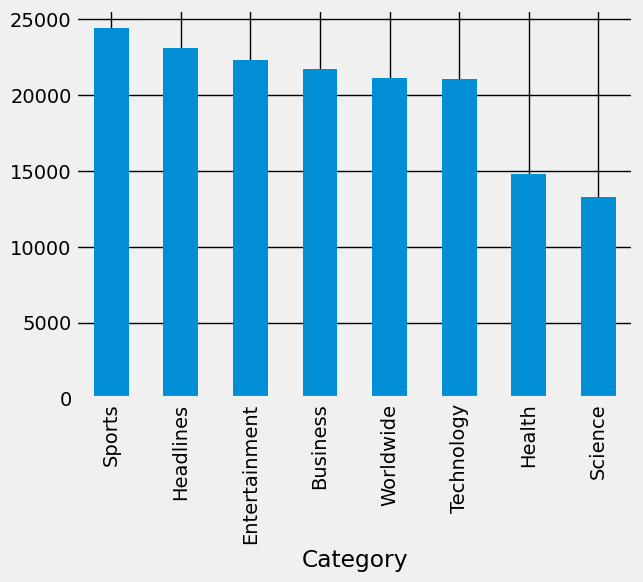

In [8]:
plt.style.use('fivethirtyeight')
mpl.rcParams['grid.color'] = "black"
df['Category'].value_counts().plot(kind = 'bar')
plt.show()

## __ONE HOT ENCODING__

In [9]:
Category = pd.get_dummies(df.Category, dtype=int)
df = pd.concat([df, Category], axis=1)
df = df.drop(columns='Category', axis=1)
df.head()

,Title,Business,Entertainment,Headlines,Health,Science,Sports,Technology,Worldwide
0,Chainlink LINK Falters Hedera HBAR Wobbles Yet...,1,0,0,0,0,0,0,0
1,Funds punished for owning too few Nvidia share...,1,0,0,0,0,0,0,0
2,Crude oil prices stalled as hedge funds sold Kemp,1,0,0,0,0,0,0,0
3,Grayscale s Bitcoin Win Is Still Only Half the...,1,0,0,0,0,0,0,0
4,I m a Home Shopping Editor and These Are the C...,1,0,0,0,0,0,0,0


## __DATA FRAME KE NUMPY__

In [10]:
Title = df['Title'].values
Category = df[['Sports', 'Headlines', 'Entertainment',
               'Business', 'Worldwide', 'Technology', 
               'Health', 'Science']].values

## __SPLIT DATA TRAINING & TESTING__

In [11]:
Title_train, Title_test, Category_train, Category_test = train_test_split(Title, Category, test_size = 0.2, random_state=123, shuffle=True)  

## __FUNGSI TOKENIZER__

In [12]:
vocab_size = 50000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="x")
tokenizer.fit_on_texts(Title_train)
tokenizer.fit_on_texts(Title_test)

sekuens_train = tokenizer.texts_to_sequences(Title_train)
padded_train = pad_sequences(sekuens_train, padding='post', maxlen=100, truncating='post')

sekuens_test = tokenizer.texts_to_sequences(Title_test)
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=100, truncating='post')



## __CALLBACK__

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90 and logs.get('val_accuracy')>0.90):
      print("\nAkurasi dan validasi telah mencapai nilai > 90%!")
      self.model.stop_training = True
callbacks = myCallback()

## __FUNGSI COMPILE, OPTEMIZER & LOSS FUNCTION__

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=256, input_length=100),
    tf.keras.layers.LSTM(64, return_sequences=True, batch_input_shape=(128, 100, 200)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 256)          12800000  
                                                                 
 lstm (LSTM)                 (None, 100, 64)           82176     
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dropout (Dropout)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8

## __FUNGSI FIT__

In [15]:
num_epochs =10
history = model.fit(padded_train, Category_train, epochs=num_epochs, 
                 validation_data=(padded_test, Category_test), verbose=1,
                 callbacks=[callbacks])

Epoch 1/10
4045/4045 [==============================] - 427s 105ms/step - loss: 0.7220 - accuracy: 0.7591 - val_loss: 0.4200 - val_accuracy: 0.8597
Epoch 2/10
4045/4045 [==============================] - 431s 107ms/step - loss: 0.3817 - accuracy: 0.8788 - val_loss: 0.4067 - val_accuracy: 0.8680
Epoch 3/10
4045/4045 [==============================] - 431s 106ms/step - loss: 0.2922 - accuracy: 0.9025 - val_loss: 0.4296 - val_accuracy: 0.8691
Epoch 4/10
4045/4045 [==============================] - 432s 107ms/step - loss: 0.2450 - accuracy: 0.9148 - val_loss: 0.4642 - val_accuracy: 0.8704
Epoch 5/10
4045/4045 [==============================] - 431s 107ms/step - loss: 0.2153 - accuracy: 0.9223 - val_loss: 0.5065 - val_accuracy: 0.8703
Epoch 6/10
4045/4045 [==============================] - 431s 106ms/step - loss: 0.1896 - accuracy: 0.9284 - val_loss: 0.6132 - val_accuracy: 0.8671
Epoch 7/10
4045/4045 [==============================] - 431s 106ms/step - loss: 0.1746 - accuracy: 0.9320 - val_

## __PLOTTING__

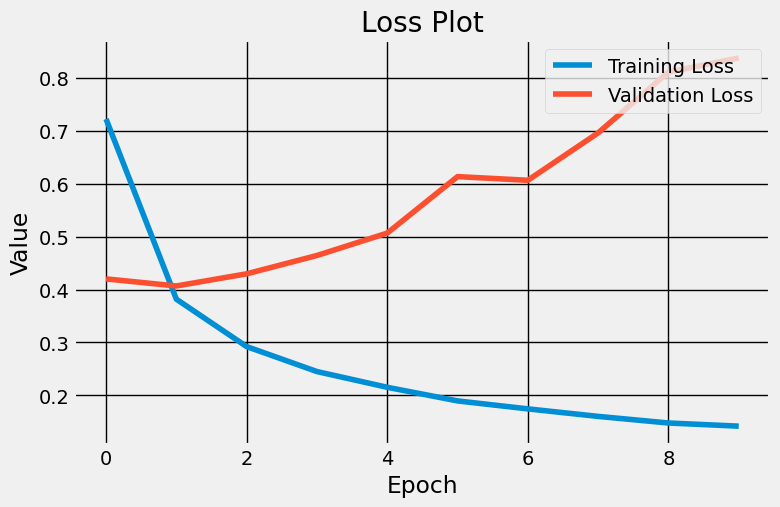

In [16]:
#loss Plot
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

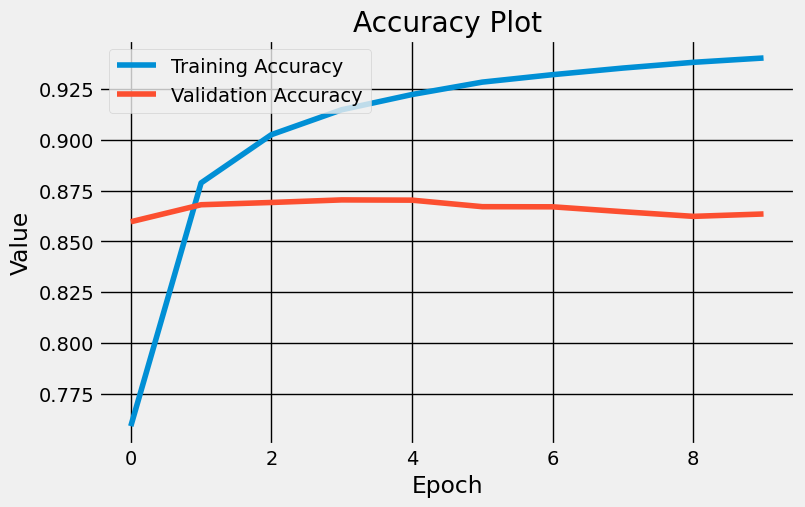

In [17]:
#Accuracy Plot
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()